<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVPPuc_Sprint2/blob/MVP_PUC_ThiagoPedrazi/MVP_Sprint3_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pós Graduação Ciência de Dados - PUC Rio**

## MVP Sprint 3 - Engenharia de Dados

### Thiago Pedrazi
### Out/23


# **1) Perguntas de Negócio** 💡

O Objetivo do projeto é responder dúvidas de negócio referente ao indicador de Pax.
Pax é um indicador que mede a quantidade de visitantes por exemplo, em um Parque de Turismo.
As perguntas de negócio que serão respondidas são as seguintes:

1) Pax por ano;
2) Pax mensal por ano;
3) Pax mensal;
4) Pax por Dia de Semana.

Eu sou da área de TI, e atualmente trabalho como Analista de Dados. Esse case é uma solução técnica real de onde eu trabalho, e de diversas frentes que estou atuando.
O projeto foi feito no ambiente da Azure, e para responder as perguntas de negócios foi utilizado o Microsoft Power BI (vizualização de dados).  


# **2) Solução Técnica (Criar o processo de extração dos transacionais SIG, Skidata e Máximo)**

Acessando os sistemas através do banco de dados com os usuários e acessos disponibilizados pela empresa, será realizado dentro do Azure Data Factory uma extração, transformação e carregamento para unificação desses dados e organização dos mesmos gerando banco de dados intermediário, porém num mesmo repositório a fim de concluir essa unificação de fonte de dados para os BIs.

## 2.1) Linked Services Criados:

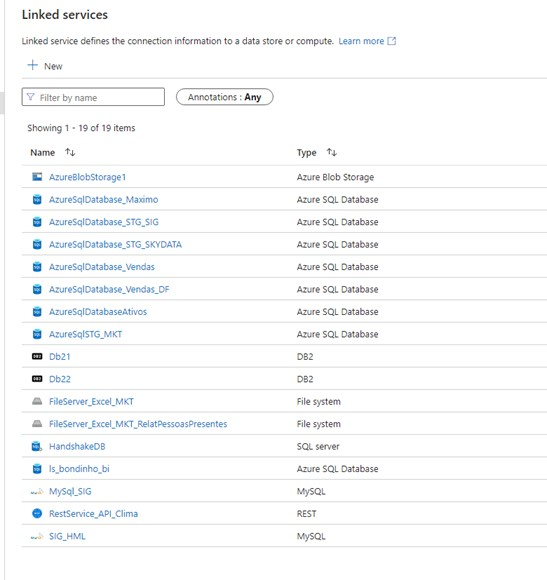

## 2.2) Integrations Runtimes Criados:

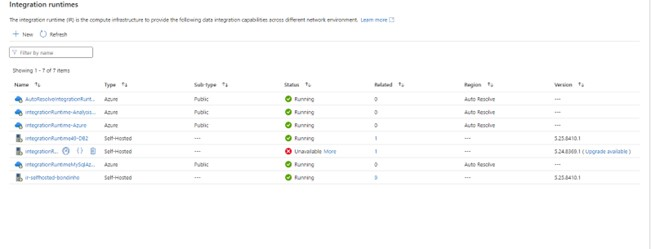

## 2.3) Datasets Criados:

a) SKYDATA: AzureSqlSTG_Skydata // ds_HandshakeDB


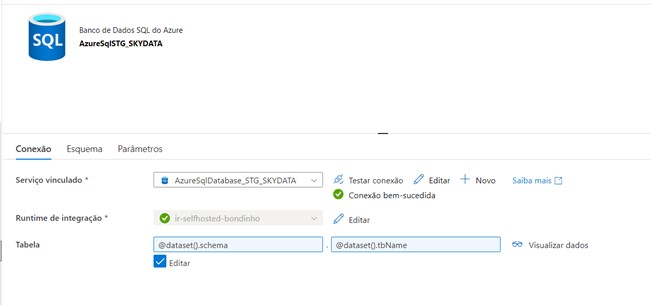

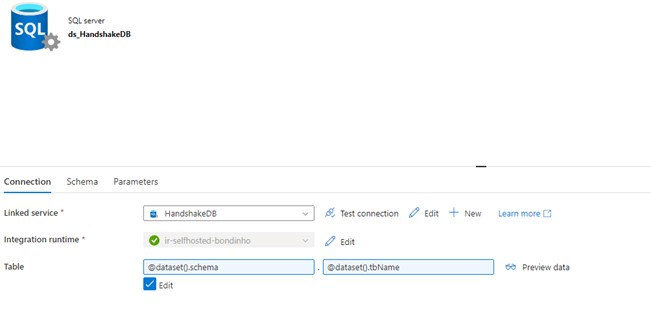

## 2.3) Datasets Criados:

b) SIG: AzureSqlSTG_SIG // MySql_SIG_vw_product_name

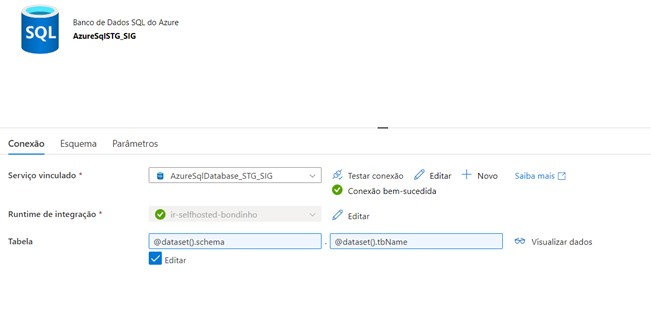

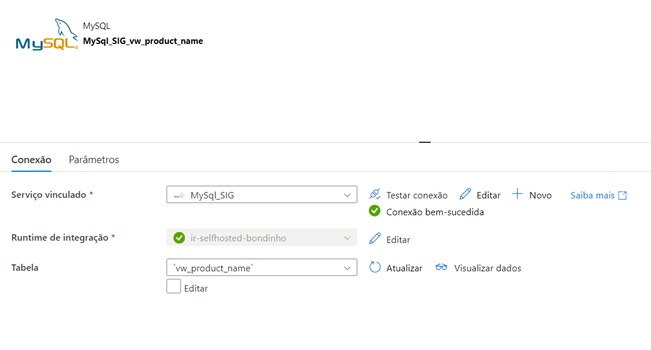

- MySql_SIG_vw_ticket_visit_bi
- MySql_SIG_vw_valid_coordinates_zone_transfer
- MySqlTable_new_bookings
- MySqlTable_new_customer
- MySqlTable_new_items
- MySqlTable_new_quantity
- MySqlTable_new_product
- MySqlTable_new_tickets
- MySqlTable_new_payments
- MySqlTable_reservations_qrcode
- MySqlTable_pick_up
- MySqlTable_new_transfer
- MySqlTable_zones_transfer

## 2.3) Datasets Criados:

c) MKT - Planilhas

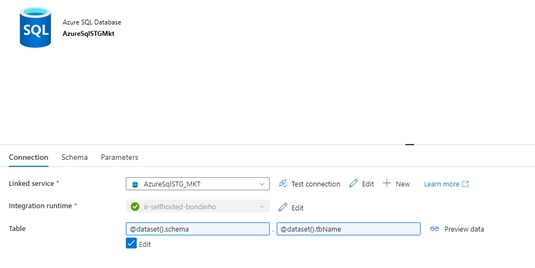

- MKT_Excel_DimensoesII
- MKT_Excel _Meta2022
- MKT_Excel _Pax2018_20


## 2.3) Datasets Criados:

d) MÁXIMO

Db2Table_Asset

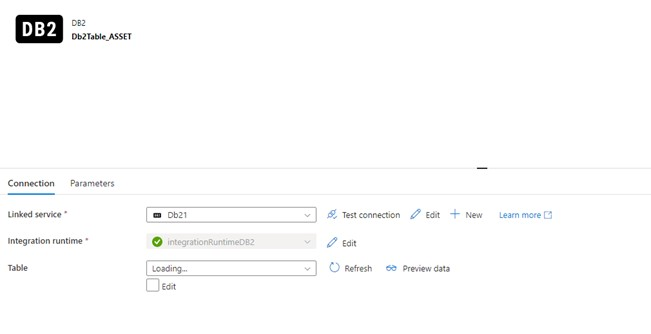

- Db2Table_ASSIGNMENT
- Db2Table_ASSIGNMENT2
- Db2Table_BON_PERSONCAL_DISP
- Db2Table_BON_WO_MANSER_COGNOS_VIEW
- Db2Table_CRAFT
- Db2Table_DOCINFO
- Db2Table_INSPECTIONRESULT
- Db2Table_JOBPLAN
- Db2Table_JOBTASK
- Db2Table_LABOR
- Db2Table_LABTRANS
- Db2Table_MODAVAIL
- Db2Table_PERSONCAL
- Db2Table_PM
- Db2Table_ROUTES
- Db2Table_SYNONYMDOMAIN
- Db2Table_WORKLOG
- Db2Table_WORKORDER
- Db2Table_WORKPERIOD
- Db2Table_WORKTYPE
- Db2Table_WOSTATUS
- Db2Table_WPLABOR


## 2.3) Datasets Criados:

d) MÁXIMO

Json_Asset

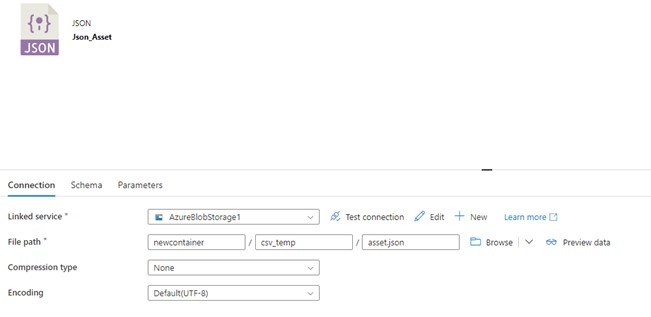

- Json_ASSIGNMENT
- Json_ASSIGNMENT2
- Json_BON_PERSONCAL_DISP
- Json_BON_WO_MANSER_COGNOS_VIEW
- Json_CRAFT
- Json_DOCINFO
- Json_INSPECTIONRESULT
- Json_JOBPLAN
- Json_JOBTASK
- Json_LABOR
- Json_LABTRANS
- Json_MODAVAIL
- Json_PERSONCAL
- Json_PM
- Json_ROUTES
- Json_SYNONYMDOMAIN
- Json_WORKLOG
- Json_WORKORDER
- Json_WORKPERIOD
- Json_WORKTYPE
- Json_WOSTATUS
- Json_WPLABOR

## 2.3) Datasets Criados:

e) Analytics Repository

AzureSql_Ativos

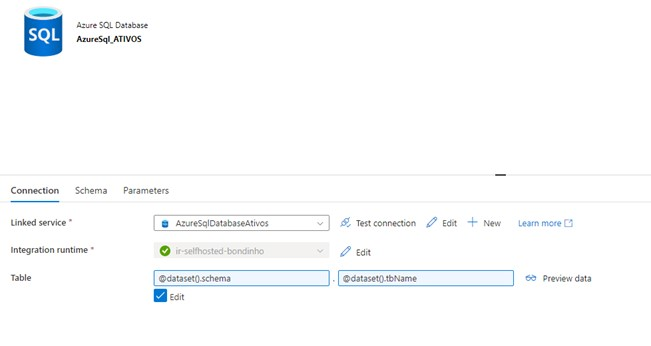

## 2.3) Datasets Criados:

e) Analytics Repository

AzureSql_Vendas

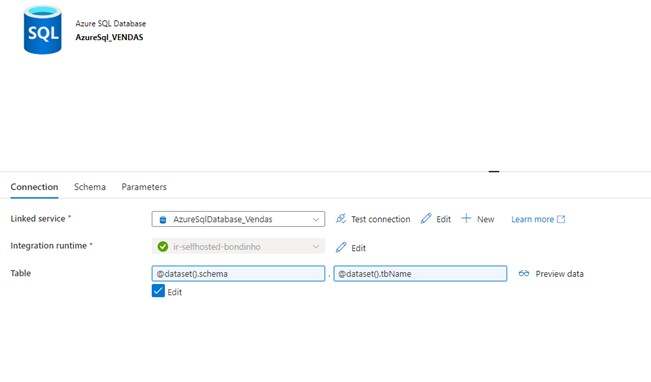

## 2.4) Datasets Criados:

Pasta InBound

a) Carga Inicial SIG
Carga inicial foi efetuada para todos os DataSets

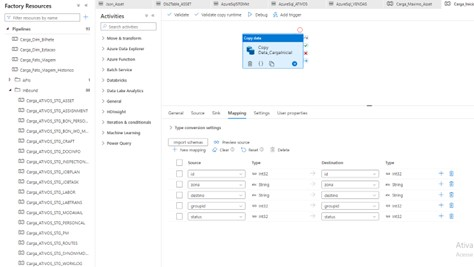

## 2.4) Datasets Criados:

b) Carga Incremental SIG
Verifica último registro em Analytics para gerar inbound

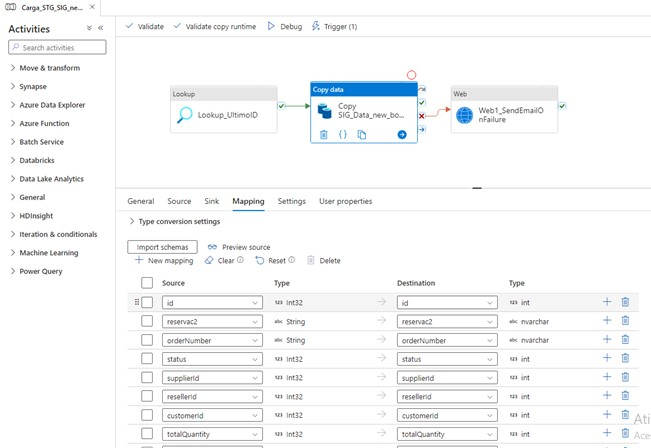

Carga_STG_SIG_vw_product_name

Copiar Dados

Origem:

Database: MySql_SIG_vw_product_name

Destino

DataSet: AzureSqlSTG_SIG

STG_vw_product_name


Carga_STG_SIG_vw_ticket_visit_bi


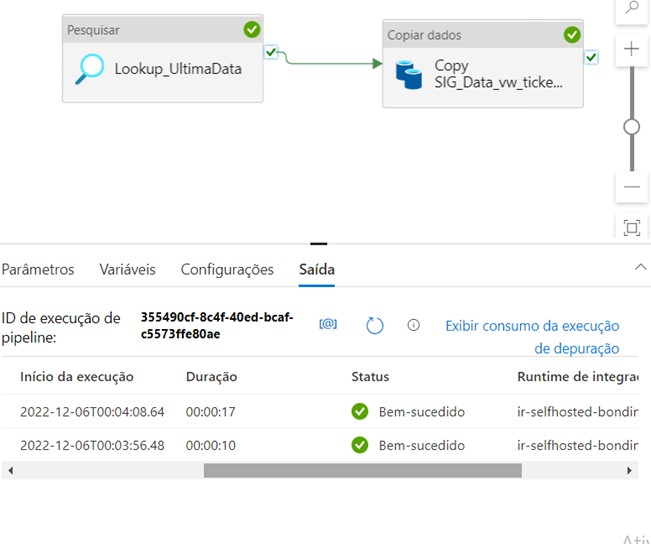

Lookup_UltimaData


	- Busca Ultimo SaleDate
select MAX([saleDate]) As SaleDate
FROM [STG_vw_ticket_visit_bi]

Copiar Dados
	   Origem:
		Database: MySql_SIG_vw_ticket_visit_bi
@concat('SELECT * FROM vw_ticket_visit_bi WHERE saleDate > ',
substring(activity('Lookup_UltimaData').output.firstRow.SaleDate,0,10 ))


	  Destino
		DataSet: AzureSqlSTG_SIG
STG_vw_ticket_visit_bi



- Carga_STG_SIG_new_bookings
- Carga_STG_SIG_new_customer
- Carga_STG_SIG_new_items
- Carga_STG_SIG_new_quantity
- Carga_STG_SIG_new_product
- Carga_STG_SIG_new_source
- Carga_STG_SIG_new_tickets
- Carga_STG_SIG_new_payments
- Carga_STG_SIG_reservations_qrcode
- Carga_STG_SIG_pick_up
- Carga_STG_SIG_new_transfer


## 2.4) Datasets Criados:

c) Carga Incremental SKYDATA

Carga_STG_SkyData_HSProperties

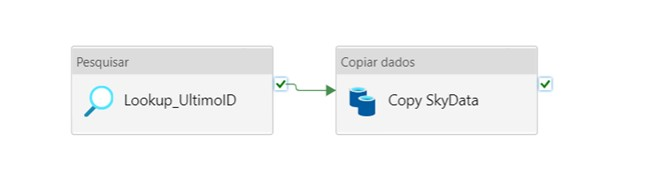

Lookup_UltimoID
	- Busca Ultimo HSPropertyID
	select MAX([HSPropertyId]) As HSPropertyID FROM [STG_HSProperties]

Copiar Dados
	   Origem:
		Database: Ds_HandshakeDB
		Tabela: 	HSProperties
			@concat('SELECT * FROM HSProperties WHERE HSPropertyId > ',
string(activity('Lookup_UltimoID').output.firstRow.HSPropertyId))

	  Destino
		DataSet: AzureSqlSTG_SIG
		STG_HSProperties


## 2.4) Datasets Criados:

c) Carga Incremental SKYDATA

Carga_STG_SkyData_HSPropertyStatistics

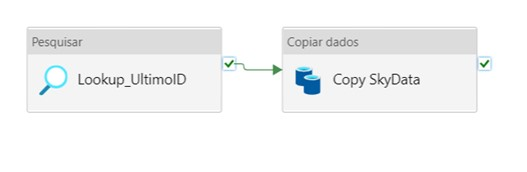

Lookup_UltimoID


	- Busca Ultimo TransactionID
select MAX([TransactionId]) As TransactionID FROM [STG_HSPropertyStatistics]

Copiar Dados
	   Origem:
		Database: Ds_HandshakeDB
		Tabela: 	HSPropertyStatistics
@concat('SELECT * FROM HSPropertyStatistics WHERE TransactionId > ', string(activity('Lookup_UltimoID').output.firstRow.TransactionId))

	  Destino
		DataSet: AzureSqlSTG_SIG
STG_HSPropertyStatistics


## 2.4) Datasets Criados:

c) Carga Incremental SKYDATA

Carga_STG_SkyData_HSPropertyTypes

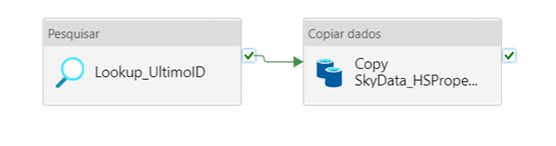

Lookup_UltimoID


	- Busca Ultimo HSPropertyTypeID
select MAX([HSPropertyTypeId]) As HSPropertyTypeID
FROM [STG_HSPropertyTypes]

Copiar Dados
	   Origem:
		Database: Ds_HandshakeDB
		Tabela: 	HSPropertyTypes
@concat('SELECT * FROM HSPropertyTypes WHERE HSPropertyTypeId > ',
string(activity('Lookup_UltimoID').output.firstRow.HSPropertyTypeId))

	  Destino
		DataSet: AzureSqlSTG_SIG
STG_HSPropertyTypes


## 2.4) Datasets Criados:

c) Carga Incremental SKYDATA

Carga_STG_SkyData_Locations

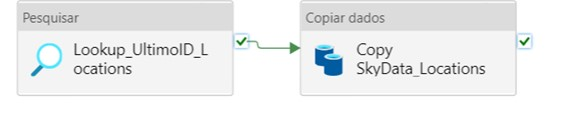

Lookup_UltimoID


	- Busca Ultimo LocationId
select MAX([LocationId]) As LocationId
FROM [STG_Locations]

Copiar Dados
	   Origem:
		Database: Ds_HandshakeDB
		Tabela: 	Locations

@concat('SELECT * FROM Locations WHERE LocationId > ',
string(activity('Lookup_UltimoID_Locations').output.firstRow.LocationId))


	  Destino
		DataSet: AzureSqlSTG_SIG
STG_Locations

## 2.4) Datasets Criados:

c) Carga Incremental SKYDATA

Carga_STG_SkyData_Transactions

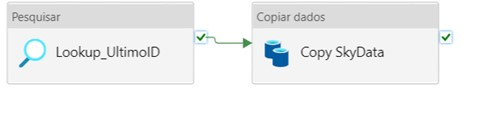

Lookup_UltimoID


	- Busca Ultimo TransactionID
select MAX([TransactionId]) As TransactionID
FROM [STG_TransactionStatistics]

Copiar Dados
	   Origem:
		Database: Ds_HandshakeDB
		Tabela: 	TransactionStatistics

@concat('SELECT * FROM TransactionStatistics WHERE TransactionTime > ',
substring(activity('Lookup_UltimoID').output.firstRow.TransactionID,0,10 ))

	  Destino
		DataSet: AzureSqlSTG_SIG
STG_TransactionStatistics

## 2.4) Datasets Criados:

d) Carga Inicial Máximo

Por ser DB2 todos os processos tiveram que ser efetuados em duas etapas:
1.	DB2 para json
2.	Json para SQL

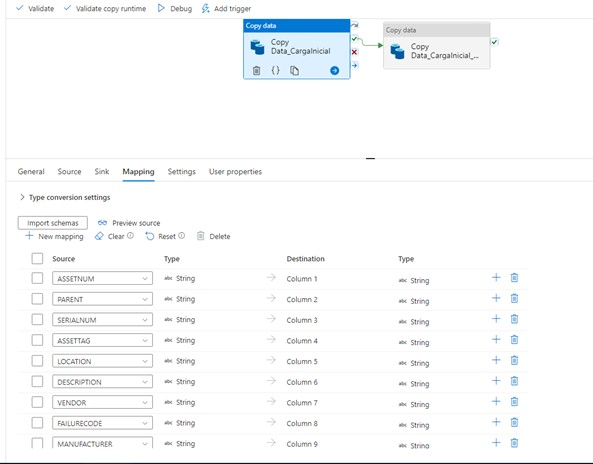

## 2.4) Datasets Criados:

e) Carga Incremental Máximo

Efetuado em 5 etapas, sendo criada uma tabela TMP para cada DataSet de modo a encontrar o processo incremental.
Ao final, exclui tabelas do Inbound.


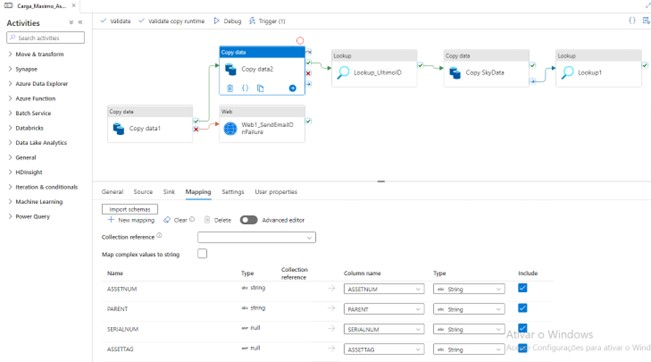

- Carga_MAXIMO_ASSET
- Carga_MAXIMO_ASSIGNMENT
- Carga_MAXIMO_ASSIGNMENT2
- Carga_MAXIMO_BON_PERSONCAL_DISP
- Carga_MAXIMO_BON_WO_MANSER_COGNOS_VIEW
- Carga_MAXIMO_CRAFT
- Carga_MAXIMO_DOCINFO
- Carga_MAXIMO_INSPECTIONRESULT
- Carga_MAXIMO_JOBPLAN
- Carga_MAXIMO_JOBTASK
- Carga_MAXIMO_LABOR
- Carga_MAXIMO_LABTRANS
- Carga_MAXIMO_MODAVAIL
- Carga_MAXIMO_PERSONCAL
- Carga_MAXIMO_PM
- Carga_MAXIMO_ROUTES
- Carga_MAXIMO_SYNONYMDOMAIN
- Carga_MAXIMO_WORKLOG
- Carga_MAXIMO_WORKORDER
- Carga_MAXIMO_WORKPERIOD
- Carga_MAXIMO_WORKTYPE
- Carga_MAXIMO_WOSTATUS
- Carga_MAXIMO_WPLABOR


## 2.4) Datasets Criados:

f) Carga MKT

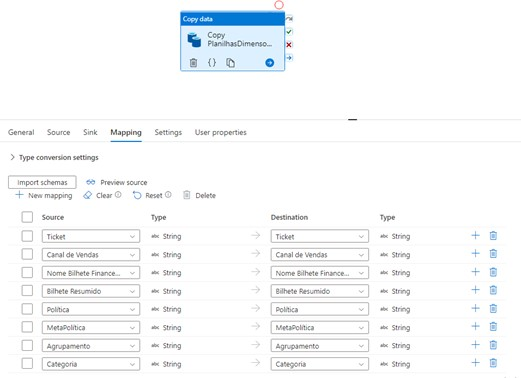

- MKT_Excel_DimensoesII
- MKT_Excel _Meta2022
- MKT_Excel _Pax2018_20


# **3) Hubs  de  Vendas,  MKT  e Manutenção**

Acessando  os repositórios criados na  área  de  INBOUND,  será  realizado  dentro  do  Azure  Data Factory  uma extração,  transformação e carregamento para  unificação  desses  dados  e  organização  dos  mesmos gerando Analytics Repository com um fluxo para carga full dos dados e outro fluxo para carga incremental diária. Afim de concluir essa unificação de fonte de dados para os BIs.

## 3.1) Carga Inicial

Foi efetuado todo o processo Inicial de cargas de Vendas.

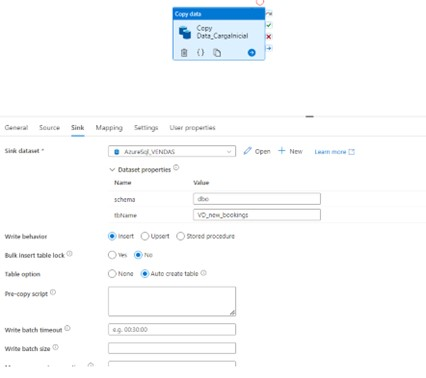

## 3.1) Carga Incremental Vendas

Efetuado em 4 etapas, sendo ao final a limpeza das tabelas de InBound.